In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [8]:
df = pd.read_csv('/content/^MXX.csv')

In [9]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,44802.730469,44807.828125,44039.109375,44134.390625,44134.390625,126493100
1,2020-01-28,44206.679688,44811.519531,44206.679688,44717.941406,44717.941406,126852800
2,2020-01-29,44858.378906,45198.710938,44683.589844,45132.601563,45132.601563,166379800
3,2020-01-30,45088.101563,45088.101563,44635.921875,44862.761719,44862.761719,160392700
4,2020-01-31,44759.898438,44829.921875,44079.390625,44108.308594,44108.308594,312755900


In [10]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
724,2022-12-08,50721.500000,51298.859375,50721.500000,51078.699219,51078.699219,123034000
725,2022-12-09,51170.621094,51170.890625,50423.738281,50466.250000,50466.250000,121540600
726,2022-12-13,50638.820313,51084.441406,50240.449219,50333.101563,50333.101563,284653100
727,2022-12-14,50430.941406,50452.640625,49781.718750,50047.699219,50047.699219,170810200
728,2022-12-15,49972.949219,49976.488281,49281.230469,49342.339844,49342.339844,278214000


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,729.000000,729.000000,729.000000,729.000000,729.000000,7.290000e+02
mean,46246.020533,46568.147548,45881.409830,46230.855753,46230.855753,1.780046e+08
std,5943.410753,5943.693614,5951.155514,5954.602128,5954.602128,1.147511e+08
min,33338.378906,33896.281250,32503.250000,32964.218750,32964.218750,1.431500e+06
25%,42121.621094,42493.460938,41744.058594,42167.238281,42167.238281,1.243700e+08
50%,47711.019531,47987.589844,47323.359375,47741.500000,47741.500000,1.582080e+08
75%,51149.468750,51436.941406,50807.589844,51114.160156,51114.160156,1.976686e+08
max,56610.031250,57064.160156,56274.781250,56609.539063,56609.539063,1.347137e+09


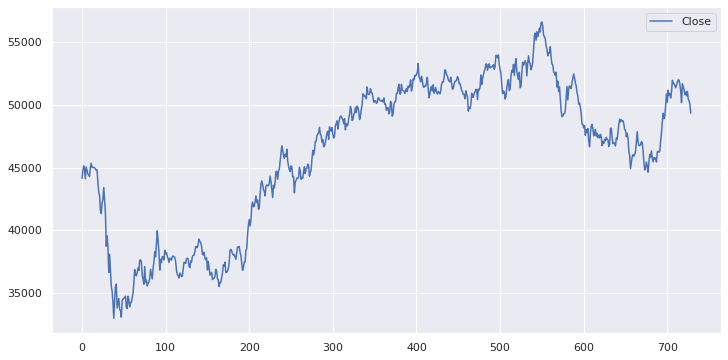

In [12]:
df[['Close']].plot(figsize=(12,6));


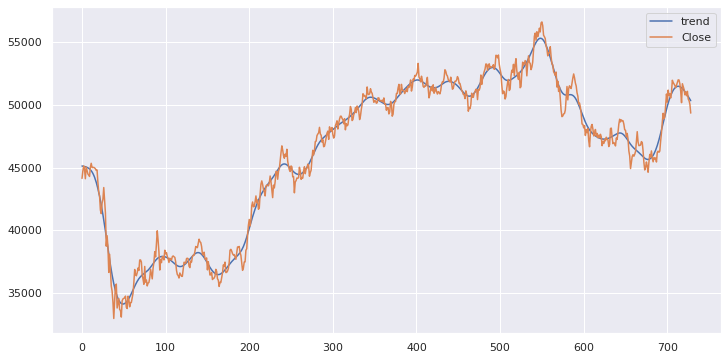

In [13]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [14]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.1606239812749697,
 0.6903009109330016,
 0,
 728,
 {'1%': -3.4393644334758475,
  '5%': -2.8655182850048306,
  '10%': -2.568888486973192},
 10887.629479695477)

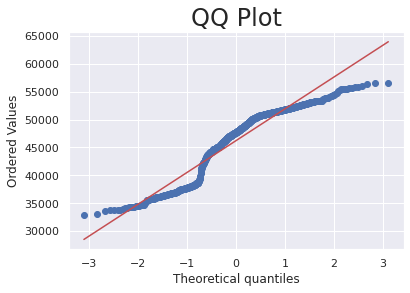

In [15]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [16]:
df['returns'] = df.Close.pct_change(1)*100

In [17]:
df['sq_returns'] = df.returns.mul(df.returns)


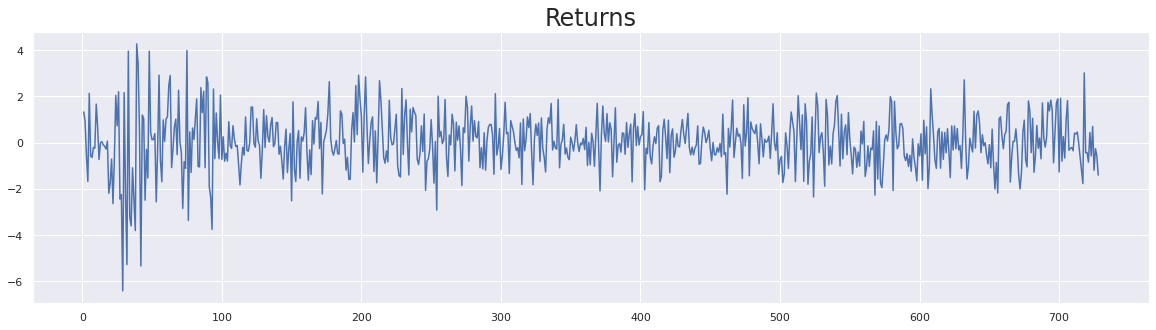

In [18]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


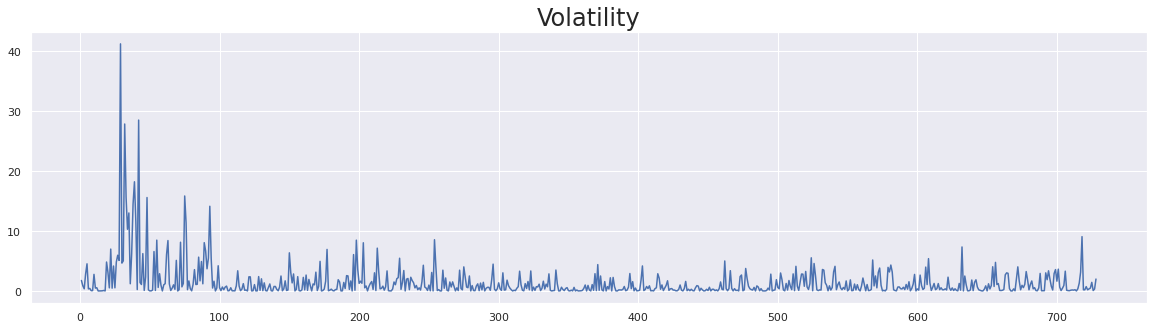

In [19]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

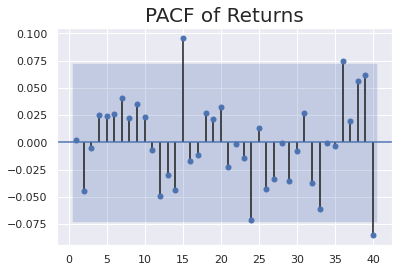

In [20]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

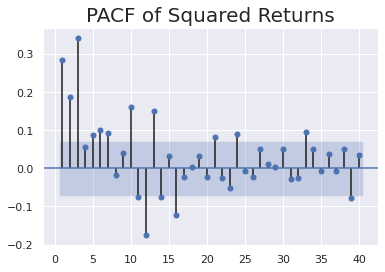

In [21]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [22]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 20.0 MB/s eta 0:00:00


In [23]:
from arch import arch_model


In [24]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [25]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 4190.491529840276
Iteration:      2,   Func. Count:     12,   Neg. LLF: 49529.38044775954
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1162.6093433836159
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1137.443377561147
Iteration:      5,   Func. Count:     28,   Neg. LLF: 1137.4433775611221
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1137.443377561147
            Iterations: 5
            Function evaluations: 28
            Gradient evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1137.44
Distribution:                  Normal   AIC:                           2280.89
Method:            Maximum Likelihood   BIC:                           2294.66
                                        No. Observations:                  728
Date:                Thu, Jan 26 2023   Df Residuals:                      727
Time:                        02:10:46   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0283  4.175e-02      0.679      0.497 [-5.350e-02,  0.110]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.0071  9.388e-02     10.728  7.492e-27 [  0.823,  1.191]
alpha[1]       0.3062  7.934e-02      3.860  1.134e-04 [  0.151,  0.462]
========================================================================

Covariance estimator: robust
"""

In [26]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 1120.3454209640304
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1120.3454209640304
            Iterations: 6
            Function evaluations: 39
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1120.35
Distribution:                  Normal   AIC:                           2248.69
Method:            Maximum Likelihood   BIC:                           2267.05
                                        No. Observations:                  728
Date:                Thu, Jan 26 2023   Df Residuals:                      727
Time:                        02:10:46   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0449  3.926e-02      1.143      0.253 [-3.208e-02,  0.122]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.7851  7.453e-02     10.534  5.997e-26   [  0.639,  0.931]
alpha[1]       0.2424  6.824e-02      3.552  3.820e-04   [  0.109,  0.376]
alpha[2]       0.2116  6.151e-02      3.440  5.808e-04 [9.107e-02,  0.332]
==========================================================================

Covariance estimator: robust
"""

In [27]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 1124.3848982092102
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1112.8887768399395
            Iterations: 9
            Function evaluations: 65
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1112.89
Distribution:                  Normal   AIC:                           2235.78
Method:            Maximum Likelihood   BIC:                           2258.73
                                        No. Observations:                  728
Date:                Thu, Jan 26 2023   Df Residuals:                      727
Time:                        02:10:47   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0333  3.936e-02      0.845      0.398 [-4.388e-02,  0.110]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.7345  7.251e-02     10.129  4.122e-24   [  0.592,  0.877]
alpha[1]       0.1661  5.262e-02      3.157  1.597e-03 [6.296e-02,  0.269]
alpha[2]       0.1677  5.424e-02      3.091  1.992e-03 [6.137e-02,  0.274]
alpha[3]       0.1250  4.759e-02      2.628  8.595e-03 [3.178e-02,  0.218]
==========================================================================

Covariance estimator: robust
"""

In [28]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     87,   Neg. LLF: 1201.8869792883738
Iteration:     10,   Func. Count:    173,   Neg. LLF: 1111.070869064199
Iteration:     15,   Func. Count:    258,   Neg. LLF: 1103.8686777886537
Iteration:     20,   Func. Count:    341,   Neg. LLF: 1100.7755052302487
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1100.7505254089565
            Iterations: 23
            Function evaluations: 390
            Gradient evaluations: 23


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1100.75
Distribution:                  Normal   AIC:                           2231.50
Method:            Maximum Likelihood   BIC:                           2300.36
                                        No. Observations:                  728
Date:                Thu, Jan 26 2023   Df Residuals:                      727
Time:                        02:10:47   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0314  3.723e-02      0.842      0.400 [-4.162e-02,  0.104]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.4764      0.121      3.939  8.171e-05      [  0.239,  0.713]
alpha[1]       0.1215  4.970e-02      2.445  1.447e-02    [2.412e-02,  0.219]
alpha[2]       0.1339  5.397e-02      2.481  1.310e-02    [2.813e-02,  0.240]
alpha[3]       0.0893  4.670e-02      1.912  5.591e-02   [-2.253e-03,  0.181]
alpha[4]       0.0000  4.557e-02      0.000      1.000 [-8.931e-02,8.931e-02]
alpha[5]       0.0000  5.732e-02      0.000      1.000      [ -0.112,  0.112]
alpha[6]       0.0309  3.744e-02      0.826      0.409   [-4.248e-02,  0.104]
alpha[7]       0.1361  5.859e-02      2.324  2.015e-02    [2.130e-02,  0.251]
alpha[8]       0.0639  5.890e-02      1.085      0.278   [-5.154e-02,  0.179]
alpha[9]       0.0434  4.697e-02      0.923      0.356   [-4.868e-02,  0.135]
alpha[10]  5.8579e-03  4.302e-02      0.136      0.892 [-7.846e-02,9.017e-02]
alpha[11]      0.0178  3.321e-02      0.537      0.591 [-4.724e-02,8.292e-02]
alpha[12]  7.3402e-14  3.679e-02  1.995e-12      1.000 [-7.211e-02,7.211e-02]
alpha[13]      0.0000  4.303e-02      0.000      1.000 [-8.433e-02,8.433e-02]
=============================================================================

Covariance estimator: robust
"""

In [29]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [30]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 1105.9220640135827
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1105.9212571329545
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1105.92
Distribution:                  Normal   AIC:                           2219.84
Method:            Maximum Likelihood   BIC:                           2238.20
                                        No. Observations:                  728
Date:                Thu, Jan 26 2023   Df Residuals:                      727
Time:                        02:10:47   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0281  3.744e-02      0.749      0.454 [-4.533e-02,  0.101]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0753  6.985e-02      1.078      0.281 [-6.162e-02,  0.212]
alpha[1]       0.1140  6.234e-02      1.828  6.748e-02 [-8.196e-03,  0.236]
beta[1]        0.8289      0.108      7.658  1.888e-14    [  0.617,  1.041]
===========================================================================

Covariance estimator: robust
"""

In [31]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 1218.851187059276
Iteration:     10,   Func. Count:     73,   Neg. LLF: 1105.8991038254974
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1105.8979206828687
            Iterations: 13
            Function evaluations: 91
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1105.90
Distribution:                  Normal   AIC:                           2221.80
Method:            Maximum Likelihood   BIC:                           2244.75
                                        No. Observations:                  728
Date:                Thu, Jan 26 2023   Df Residuals:                      727
Time:                        02:10:47   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0279  3.748e-02      0.745      0.456 [-4.551e-02,  0.101]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0775  6.811e-02      1.138      0.255 [-5.596e-02,  0.211]
alpha[1]       0.1188  5.819e-02      2.041  4.122e-02  [4.731e-03,  0.233]
beta[1]        0.7619      0.212      3.592  3.281e-04    [  0.346,  1.178]
beta[2]        0.0604      0.223      0.272      0.786    [ -0.376,  0.497]
===========================================================================

Covariance estimator: robust
"""

In [32]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 143012028.5241979
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1105.7006424422675
Iteration:     15,   Func. Count:    117,   Neg. LLF: 1105.6967708335196
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1105.696770833518
            Iterations: 15
            Function evaluations: 117
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1105.70
Distribution:                  Normal   AIC:                           2223.39
Method:            Maximum Likelihood   BIC:                           2250.94
                                        No. Observations:                  728
Date:                Thu, Jan 26 2023   Df Residuals:                      727
Time:                        02:10:47   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0288  9.730e-02      0.296      0.767 [ -0.162,  0.220]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.0788      0.136      0.578      0.563 [ -0.188,  0.346]
alpha[1]       0.1263      0.161      0.782      0.434 [ -0.190,  0.443]
beta[1]        0.7238      8.165  8.864e-02      0.929 [-15.279, 16.727]
beta[2]        0.0000     12.842      0.000      1.000 [-25.169, 25.169]
beta[3]        0.0900      4.927  1.826e-02      0.985 [ -9.567,  9.747]
========================================================================

Covariance estimator: robust
"""

In [33]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1114.2549066856523
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1105.9283861683355
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1105.9212574743874
            Iterations: 14
            Function evaluations: 97
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1105.92
Distribution:                  Normal   AIC:                           2221.84
Method:            Maximum Likelihood   BIC:                           2244.79
                                        No. Observations:                  728
Date:                Thu, Jan 26 2023   Df Residuals:                      727
Time:                        02:10:47   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0281  3.744e-02      0.750      0.453 [-4.531e-02,  0.101]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0753  9.298e-02      0.810      0.418   [ -0.107,  0.258]
alpha[1]       0.1140  5.403e-02      2.110  3.487e-02 [8.101e-03,  0.220]
alpha[2]   9.0434e-19  7.982e-02  1.133e-17      1.000   [ -0.156,  0.156]
beta[1]        0.8288      0.151      5.474  4.397e-08   [  0.532,  1.126]
==========================================================================

Covariance estimator: robust
"""

In [34]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 1107.067833711862
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1105.924995307451
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1105.921257046903
            Iterations: 13
            Function evaluations: 104
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1105.92
Distribution:                  Normal   AIC:                           2223.84
Method:            Maximum Likelihood   BIC:                           2251.38
                                        No. Observations:                  728
Date:                Thu, Jan 26 2023   Df Residuals:                      727
Time:                        02:10:48   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0281  4.399e-02      0.638      0.523 [-5.815e-02,  0.114]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0753      0.208      0.362      0.717   [ -0.332,  0.482]
alpha[1]       0.1140  5.598e-02      2.036  4.175e-02 [4.256e-03,  0.224]
alpha[2]       0.0000  6.685e-02      0.000      1.000   [ -0.131,  0.131]
alpha[3]   5.9204e-13      0.157  3.779e-12      1.000   [ -0.307,  0.307]
beta[1]        0.8289      0.352      2.354  1.859e-02   [  0.139,  1.519]
==========================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [36]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     46,   Neg. LLF: 4614.809894769092
Iteration:     10,   Func. Count:     78,   Neg. LLF: 1103.5485234217567
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1103.5485234213509
            Iterations: 10
            Function evaluations: 78
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1103.55
Distribution:                  Normal   AIC:                           2217.10
Method:            Maximum Likelihood   BIC:                           2240.05
                                        No. Observations:                  728
Date:                Thu, Jan 26 2023   Df Residuals:                      727
Time:                        02:10:48   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -2.3403e-03  4.052e-02 -5.776e-02      0.954 [-8.175e-02,7.707e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      8.7787e-03  9.323e-03      0.942      0.346 [-9.494e-03,2.705e-02]
alpha[1]       0.1705  7.462e-02      2.285  2.232e-02    [2.425e-02,  0.317]
gamma[1]      -0.0755  2.692e-02     -2.804  5.049e-03   [ -0.128,-2.271e-02]
beta[1]        0.9675  2.404e-02     40.255      0.000      [  0.920,  1.015]
=============================================================================

Covariance estimator: robust
"""

In [37]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [38]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1102.26
Distribution:                  Normal   AIC:                           2214.51
Method:            Maximum Likelihood   BIC:                           2237.47
                                        No. Observations:                  728
Date:                Thu, Jan 26 2023   Df Residuals:                      727
Time:                        02:10:48   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.3368e-03  3.947e-02  5.921e-02      0.953 [-7.502e-02,7.969e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0516  4.620e-02      1.116      0.264 [-3.899e-02,  0.142]
alpha[1]       0.0468  3.576e-02      1.310      0.190 [-2.325e-02,  0.117]
gamma[1]       0.1020  4.878e-02      2.092  3.645e-02  [6.434e-03,  0.198]
beta[1]        0.8653  7.732e-02     11.191  4.524e-29    [  0.714,  1.017]
===========================================================================

Covariance estimator: robust
"""

In [39]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [40]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 1106.4659089876927
Iteration:     10,   Func. Count:     76,   Neg. LLF: 1103.4892274216693
Iteration:     15,   Func. Count:    106,   Neg. LLF: 1103.4828643777055
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1103.4828611133103
            Iterations: 17
            Function evaluations: 117
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1103.48
Distribution:                  Normal   AIC:                           2216.97
Method:            Maximum Likelihood   BIC:                           2239.92
                                        No. Observations:                  728
Date:                Thu, Jan 26 2023   Df Residuals:                      727
Time:                        02:10:48   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.5844e-03  3.991e-02 -3.970e-02      0.968 [-7.980e-02,7.664e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0413  2.786e-02      1.481      0.139 [-1.334e-02,9.588e-02]
alpha[1]       0.0498  3.162e-02      1.576      0.115   [-1.213e-02,  0.112]
gamma[1]       0.0807  2.789e-02      2.895  3.791e-03    [2.608e-02,  0.135]
beta[1]        0.8933  4.867e-02     18.353  3.104e-75      [  0.798,  0.989]
=============================================================================

Covariance estimator: robust
"""

In [41]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [42]:
from arch.univariate import FIGARCH

In [43]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 3988.96421794983
Iteration:     10,   Func. Count:     73,   Neg. LLF: 1108.7749054479605
Iteration:     15,   Func. Count:    106,   Neg. LLF: 1104.4893431235414
Iteration:     20,   Func. Count:    136,   Neg. LLF: 1104.476353394746
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1104.476353394746
            Iterations: 21
            Function evaluations: 141
            Gradient evaluations: 21


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -1104.48
Distribution:                  Normal   AIC:                           2218.95
Method:            Maximum Likelihood   BIC:                           2241.90
                                        No. Observations:                  728
Date:                Thu, Jan 26 2023   Df Residuals:                      727
Time:                        02:10:48   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0273  4.024e-02      0.678      0.498 [-5.159e-02,  0.106]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0882  9.248e-02      0.954      0.340 [-9.302e-02,  0.270]
phi        5.1025e-18      0.865  5.901e-18      1.000    [ -1.695,  1.695]
d              0.2460  8.478e-02      2.902  3.710e-03  [7.986e-02,  0.412]
beta           0.0987      0.787      0.125      0.900    [ -1.443,  1.641]
===========================================================================

Covariance estimator: robust
"""

In [44]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [45]:
from arch.univariate import HARCH

In [46]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 1211.7728910715718
Iteration:     10,   Func. Count:     57,   Neg. LLF: 1137.7277340480973
Iteration:     15,   Func. Count:     77,   Neg. LLF: 1137.443377511646
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1137.443377511646
            Iterations: 16
            Function evaluations: 80
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -1137.44
Distribution:                  Normal   AIC:                           2280.89
Method:            Maximum Likelihood   BIC:                           2294.66
                                        No. Observations:                  728
Date:                Thu, Jan 26 2023   Df Residuals:                      727
Time:                        02:10:49   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0283  4.175e-02      0.679      0.497 [-5.350e-02,  0.110]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.0072  9.388e-02     10.728  7.511e-27 [  0.823,  1.191]
alpha[1]       0.3062  7.934e-02      3.860  1.135e-04 [  0.151,  0.462]
========================================================================

Covariance estimator: robust
"""

In [47]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [48]:
from arch.univariate import APARCH


In [49]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     46,   Neg. LLF: 11019.438597845776
Iteration:     10,   Func. Count:     85,   Neg. LLF: 1102.2455329931117
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1102.2455192092784
            Iterations: 12
            Function evaluations: 98
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -1102.25
Distribution:                  Normal   AIC:                           2216.49
Method:            Maximum Likelihood   BIC:                           2244.03
                                        No. Observations:                  728
Date:                Thu, Jan 26 2023   Df Residuals:                      727
Time:                        02:10:49   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.3141e-03  3.955e-02  5.851e-02      0.953 [-7.521e-02,7.984e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0518  5.045e-02      1.026      0.305 [-4.711e-02,  0.151]
alpha[1]       0.0905  4.745e-02      1.907  5.654e-02 [-2.521e-03,  0.183]
gamma[1]       0.2803      0.165      1.703  8.860e-02 [-4.233e-02,  0.603]
beta[1]        0.8648  8.799e-02      9.828  8.532e-23    [  0.692,  1.037]
delta          2.0174      0.676      2.984  2.841e-03    [  0.693,  3.342]
===========================================================================

Covariance estimator: robust
"""

In [50]:
from scipy import stats


In [51]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=66.74513155055801, pvalue=3.219646771412954e-15)

In [52]:
jarque_bera_test.statistic

66.74513155055801

In [53]:
jarque_bera_test.pvalue

3.219646771412954e-15

jarquer-bera para los retornos

In [54]:
returns = df.returns[1:]
returns

1      1.322213
2      0.927279
3     -0.597882
4     -1.681691
5      2.128310
         ...   
724    0.695380
725   -1.199031
726   -0.263837
727   -0.567027
728   -1.409374
Name: returns, Length: 728, dtype: float64

In [55]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=167.62054555829337, pvalue=0.0)

In [56]:
jarque_bera_test.statistic

167.62054555829337

In [57]:
jarque_bera_test.pvalue

0.0

curtosis

In [58]:
returns.kurt()

2.291392850185442

coef. asimetria

In [59]:
returns.skew()

-0.31072109201188425

In [60]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -26.919
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [61]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                -15.615
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -2.60 (1%), -1.97 (5%), -1.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [62]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -26.861
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [63]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.117
P-value                         0.506
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [64]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [65]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        729 non-null    object 
 1   Open        729 non-null    float64
 2   High        729 non-null    float64
 3   Low         729 non-null    float64
 4   Close       729 non-null    float64
 5   Adj Close   729 non-null    float64
 6   Volume      729 non-null    int64  
 7   trend       729 non-null    float64
 8   returns     728 non-null    float64
 9   sq_returns  728 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 57.1+ KB


In [67]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [68]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [69]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [70]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [71]:
data = pd.read_csv("/content/^MXX.csv")

In [72]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,44802.730469,44807.828125,44039.109375,44134.390625,44134.390625,126493100
1,2020-01-28,44206.679688,44811.519531,44206.679688,44717.941406,44717.941406,126852800
2,2020-01-29,44858.378906,45198.710938,44683.589844,45132.601563,45132.601563,166379800
3,2020-01-30,45088.101563,45088.101563,44635.921875,44862.761719,44862.761719,160392700
4,2020-01-31,44759.898438,44829.921875,44079.390625,44108.308594,44108.308594,312755900
...,...,...,...,...,...,...,...
724,2022-12-08,50721.500000,51298.859375,50721.500000,51078.699219,51078.699219,123034000
725,2022-12-09,51170.621094,51170.890625,50423.738281,50466.250000,50466.250000,121540600
726,2022-12-13,50638.820313,51084.441406,50240.449219,50333.101563,50333.101563,284653100
727,2022-12-14,50430.941406,50452.640625,49781.718750,50047.699219,50047.699219,170810200


In [73]:
data = data[["Date","Close","Volume"]]


In [74]:
data

,Date,Close,Volume
0,2020-01-27,44134.390625,126493100
1,2020-01-28,44717.941406,126852800
2,2020-01-29,45132.601563,166379800
3,2020-01-30,44862.761719,160392700
4,2020-01-31,44108.308594,312755900
...,...,...,...
724,2022-12-08,51078.699219,123034000
725,2022-12-09,50466.250000,121540600
726,2022-12-13,50333.101563,284653100
727,2022-12-14,50047.699219,170810200


In [75]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,44134.390625,126493100,44717.941406
1,2020-01-28,44717.941406,126852800,45132.601563
2,2020-01-29,45132.601563,166379800,44862.761719
3,2020-01-30,44862.761719,160392700,44108.308594
4,2020-01-31,44108.308594,312755900,45047.070313
...,...,...,...,...
724,2022-12-08,51078.699219,123034000,50466.250000
725,2022-12-09,50466.250000,121540600,50333.101563
726,2022-12-13,50333.101563,284653100,50047.699219
727,2022-12-14,50047.699219,170810200,49342.339844


In [76]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,44134.390625,126493100,44717.941406
1,2020-01-28,44717.941406,126852800,45132.601563
2,2020-01-29,45132.601563,166379800,44862.761719
3,2020-01-30,44862.761719,160392700,44108.308594
4,2020-01-31,44108.308594,312755900,45047.070313
...,...,...,...,...
723,2022-12-07,50725.960938,141194800,51078.699219
724,2022-12-08,51078.699219,123034000,50466.250000
725,2022-12-09,50466.250000,121540600,50333.101563
726,2022-12-13,50333.101563,284653100,50047.699219


In [77]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [78]:
price_volume_target_scaled_df

array([[0.47240518, 0.09293386, 0.49708452],
       [0.49708452, 0.09320115, 0.51462119],
       [0.51462119, 0.12257385, 0.50320921],
       ...,
       [0.74019007, 0.08925363, 0.734559  ],
       [0.734559  , 0.21046328, 0.72248886],
       [0.72248886, 0.1258661 , 0.69265803]])

In [79]:
price_volume_target_scaled_df.shape

(728, 3)

In [80]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [81]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((728, 2), (728, 1))

In [82]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [83]:
X_train.shape, y_train.shape

((473, 2), (473, 1))

In [84]:
X_test.shape, y_test.shape

((255, 2), (255, 1))

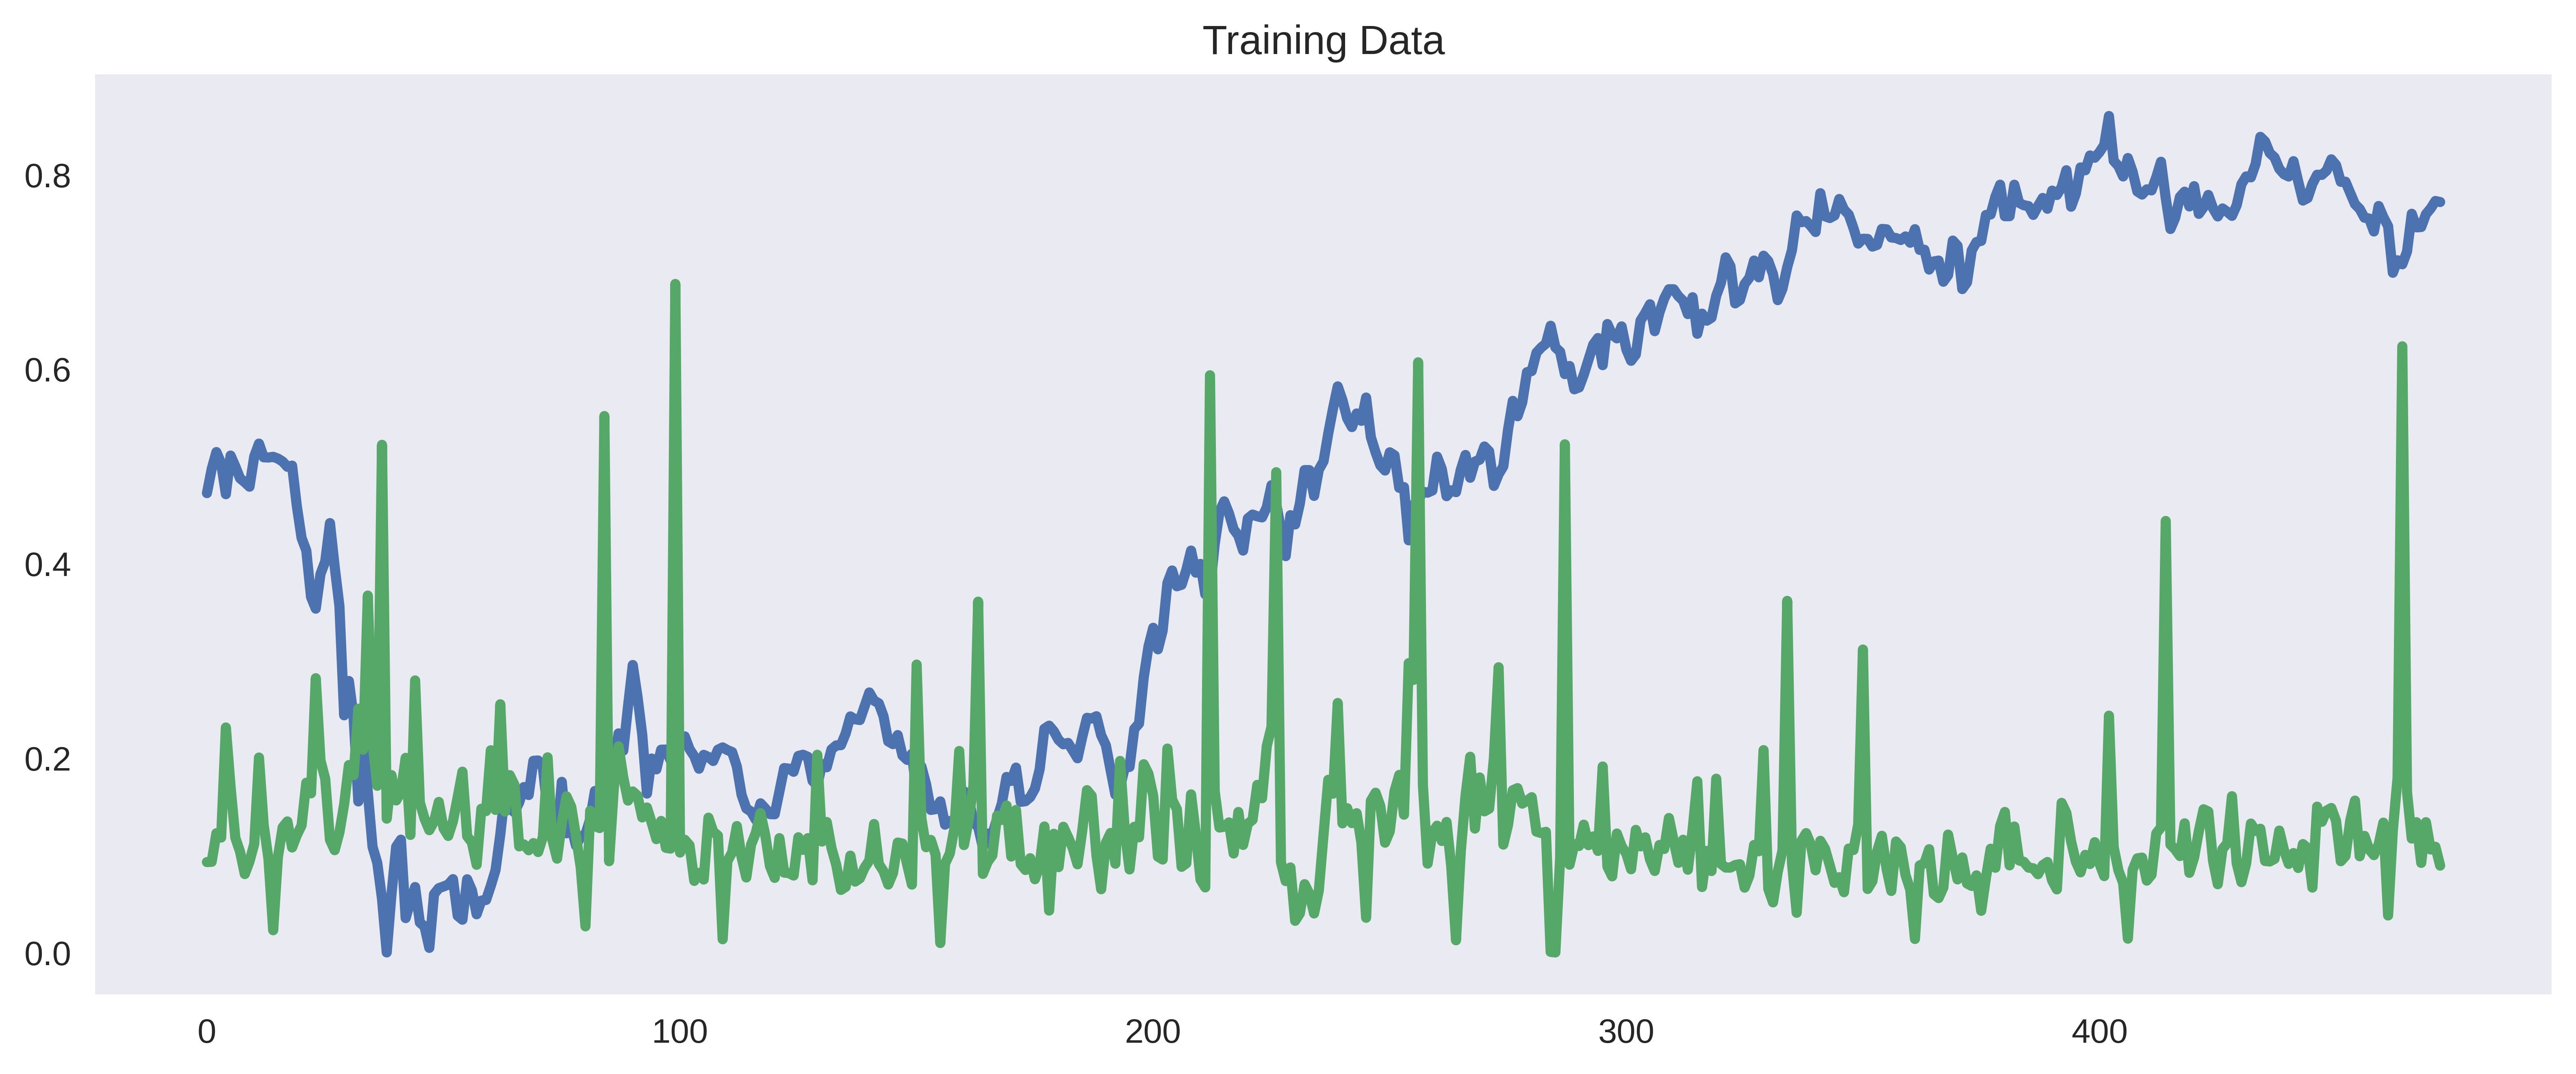

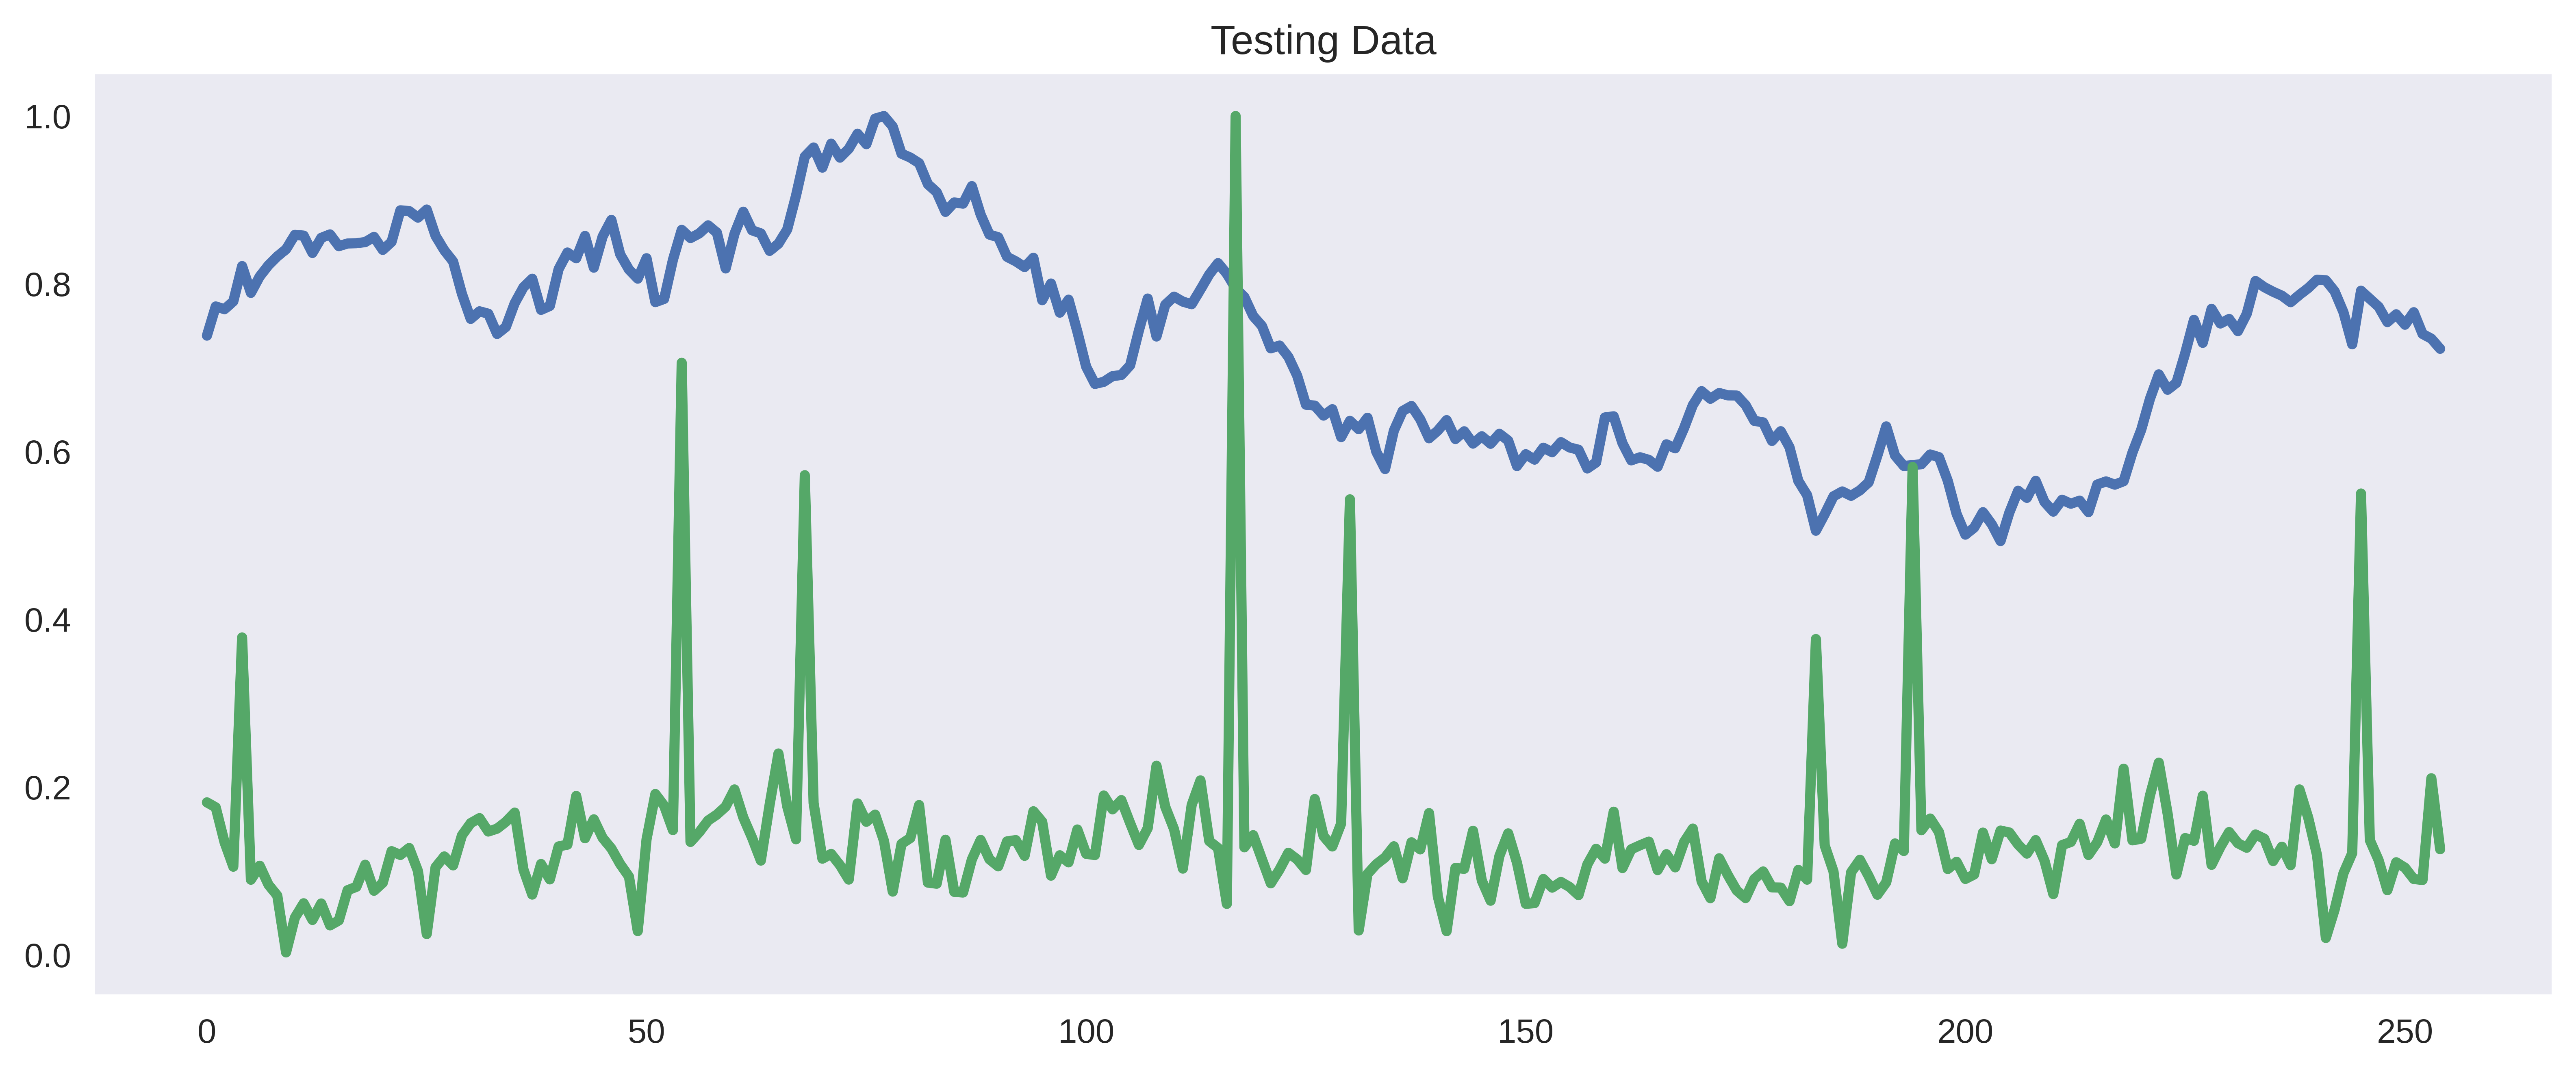

In [85]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [86]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [87]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9626963650088426


In [88]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.47327211],
       [0.49709589],
       [0.51367621],
       [0.50271149],
       [0.47055466],
       [0.50961577],
       [0.49945174],
       [0.48779307],
       [0.48423706],
       [0.47963948],
       [0.50951128],
       [0.52114837],
       [0.50837121],
       [0.50856238],
       [0.51014544],
       [0.50749829],
       [0.50416767],
       [0.49891118],
       [0.50037447],
       [0.46002572],
       [0.4283694 ],
       [0.4152527 ],
       [0.36924932],
       [0.35627602],
       [0.39170316],
       [0.40438279],
       [0.44320712],
       [0.40005764],
       [0.36080238],
       [0.25191826],
       [0.28552645],
       [0.24943853],
       [0.16525036],
       [0.22489208],
       [0.17309505],
       [0.12057972],
       [0.10523344],
       [0.06535601],
       [0.01664935],
       [0.07357689],
       [0.1214628 ],
       [0.12829739],
       [0.05000798],
       [0.06730626],
       [0.07988672],
       [0.04616079],
       [0.04222738],
       [0.021

In [89]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [90]:
len(Predicted)

728

In [91]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [92]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-27
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
...,...
723,2022-12-07
724,2022-12-08
725,2022-12-09
726,2022-12-13


In [93]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-27,0.472405
1,2020-01-28,0.497085
2,2020-01-29,0.514621
3,2020-01-30,0.503209
4,2020-01-31,0.471302
...,...,...
723,2022-12-07,0.751174
724,2022-12-08,0.766092
725,2022-12-09,0.740190
726,2022-12-13,0.734559


In [94]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-27,0.472405,0.473272
1,2020-01-28,0.497085,0.497096
2,2020-01-29,0.514621,0.513676
3,2020-01-30,0.503209,0.502711
4,2020-01-31,0.471302,0.470555
...,...,...,...
723,2022-12-07,0.751174,0.742282
724,2022-12-08,0.766092,0.756846
725,2022-12-09,0.740190,0.731852
726,2022-12-13,0.734559,0.724969


In [95]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [96]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [97]:
data

,Date,Close,Volume,Target
0,2020-01-27,44134.390625,126493100,44717.941406
1,2020-01-28,44717.941406,126852800,45132.601563
2,2020-01-29,45132.601563,166379800,44862.761719
3,2020-01-30,44862.761719,160392700,44108.308594
4,2020-01-31,44108.308594,312755900,45047.070313
...,...,...,...,...
724,2022-12-08,51078.699219,123034000,50466.250000
725,2022-12-09,50466.250000,121540600,50333.101563
726,2022-12-13,50333.101563,284653100,50047.699219
727,2022-12-14,50047.699219,170810200,49342.339844


In [98]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-27,44134.390625,126493100,44717.941406
1,2020-01-28,44717.941406,126852800,45132.601563
2,2020-01-29,45132.601563,166379800,44862.761719
3,2020-01-30,44862.761719,160392700,44108.308594
4,2020-01-31,44108.308594,312755900,45047.070313
...,...,...,...,...
724,2022-12-08,51078.699219,123034000,50466.250000
725,2022-12-09,50466.250000,121540600,50333.101563
726,2022-12-13,50333.101563,284653100,50047.699219
727,2022-12-14,50047.699219,170810200,49342.339844


In [99]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[4.41343906e+04, 1.26493100e+08],
       [4.47179414e+04, 1.26852800e+08],
       [4.51326016e+04, 1.66379800e+08],
       ...,
       [5.03331016e+04, 2.84653100e+08],
       [5.00476992e+04, 1.70810200e+08],
       [4.93423398e+04, 2.78214000e+08]])

In [100]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [101]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [102]:
X

[array([0.47240518]),
 array([0.49708452]),
 array([0.51462119]),
 array([0.50320921]),
 array([0.47130213]),
 array([0.51100393]),
 array([0.49983001]),
 array([0.48757765]),
 array([0.48360983]),
 array([0.47900863]),
 array([0.51017247]),
 array([0.52332352]),
 array([0.50922983]),
 array([0.5089997]),
 array([0.50973055]),
 array([0.50791829]),
 array([0.50484752]),
 array([0.49947813]),
 array([0.50066229]),
 array([0.45902747]),
 array([0.42636178]),
 array([0.4133191]),
 array([0.36553546]),
 array([0.35356213]),
 array([0.38921103]),
 array([0.40211049]),
 array([0.44154796]),
 array([0.39672292]),
 array([0.35628879]),
 array([0.24386812]),
 array([0.27917671]),
 array([0.24166862]),
 array([0.15531532]),
 array([0.21656852]),
 array([0.16487918]),
 array([0.10862697]),
 array([0.09217089]),
 array([0.05520301]),
 array([0.]),
 array([0.05951759]),
 array([0.10879449]),
 array([0.11597862]),
 array([0.03532494]),
 array([0.05226193]),
 array([0.06725697]),
 array([0.03077396])

In [103]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [104]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [105]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((509, 1, 1), (219, 1, 1))

In [106]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [107]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
13/13 [==============================] - 10s 146ms/step - loss: 0.1951 - val_loss: 0.4046
Epoch 2/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0718 - val_loss: 0.0145
Epoch 3/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0332 - val_loss: 0.0581
Epoch 4/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0238 - val_loss: 0.0237
Epoch 5/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0135 - val_loss: 0.0103
Epoch 6/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0072 - val_loss: 6.7058e-04
Epoch 7/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0033 - val_loss: 6.0587e-04
Epoch 8/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 9/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 10/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0022 - val_loss: 8.2649

In [108]:
# Make prediction
predicted = model.predict(X)

23/23 [==============================] - 1s 5ms/step


In [109]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [110]:
test_predicted

[0.46281633,
 0.48763785,
 0.50539434,
 0.49382812,
 0.4617115,
 0.5017237,
 0.49041122,
 0.47805297,
 0.4740612,
 0.46943858,
 0.50088054,
 0.5142423,
 0.49992493,
 0.4996916,
 0.50043255,
 0.4985958,
 0.49548605,
 0.49005568,
 0.49125242,
 0.44944367,
 0.41703475,
 0.40419194,
 0.35761905,
 0.34606746,
 0.38060048,
 0.3931997,
 0.4320583,
 0.38793078,
 0.3486939,
 0.24247038,
 0.275375,
 0.24043459,
 0.16180602,
 0.21731862,
 0.17038938,
 0.12035231,
 0.10591881,
 0.073832266,
 0.026788553,
 0.07755304,
 0.12049973,
 0.12683031,
 0.05677219,
 0.0712996,
 0.08424321,
 0.052885402,
 0.04923449,
 0.030755367,
 0.07791909,
 0.08321011,
 0.08472841,
 0.08640967,
 0.09127928,
 0.058788646,
 0.055336047,
 0.09115849,
 0.08140844,
 0.06012952,
 0.07216905,
 0.07277903,
 0.08542578,
 0.09943773,
 0.13147147,
 0.17066506,
 0.15550286,
 0.15173948,
 0.1610241,
 0.17508474,
 0.16771278,
 0.19949654,
 0.19981259,
 0.19331592,
 0.15265107,
 0.14133991,
 0.12626389,
 0.17990014,
 0.13263962,
 0.138

In [111]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
5,2020-02-04
...,...
724,2022-12-08
725,2022-12-09
726,2022-12-13
727,2022-12-14


In [112]:
df_predicted['predictions'] = test_predicted

In [113]:
df_predicted

,Date,predictions
1,2020-01-28,0.462816
2,2020-01-29,0.487638
3,2020-01-30,0.505394
4,2020-01-31,0.493828
5,2020-02-04,0.461711
...,...,...
724,2022-12-08,0.754228
725,2022-12-09,0.770479
726,2022-12-13,0.742304
727,2022-12-14,0.736204


In [114]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [115]:
df_predicted['Close'] = close[1:]

In [116]:
df_predicted

,Date,predictions,Close
1,2020-01-28,0.462816,0.497085
2,2020-01-29,0.487638,0.514621
3,2020-01-30,0.505394,0.503209
4,2020-01-31,0.493828,0.471302
5,2020-02-04,0.461711,0.511004
...,...,...,...
724,2022-12-08,0.754228,0.766092
725,2022-12-09,0.770479,0.740190
726,2022-12-13,0.742304,0.734559
727,2022-12-14,0.736204,0.722489


In [117]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")